In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

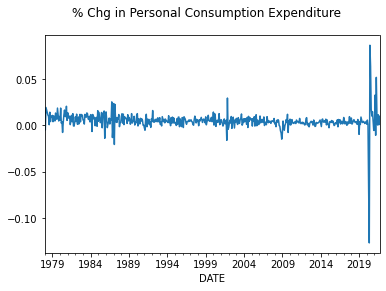

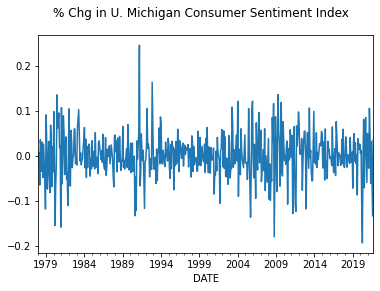

In [3]:
#Load the PCE and UMCSENT datasets
df = pd.read_csv(filepath_or_buffer='Data/UMCSENT_PCE.csv', header=0, index_col=0,
                 infer_datetime_format=True, parse_dates=['DATE'])
#Set the index frequency to 'Month-Start'
df = df.asfreq('MS')

#Plot both time series
fig = plt.figure()
fig.suptitle('% Chg in Personal Consumption Expenditure')
df['PCE_CHG'].plot()
plt.show()
fig = plt.figure()
fig.suptitle('% Chg in U. Michigan Consumer Sentiment Index')
df['UMCSENT_CHG'].plot()
plt.show()

C:\Users\sidiy\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


                        Markov Switching Model Results                        
Dep. Variable:                PCE_CHG   No. Observations:                  525
Model:               MarkovRegression   Log Likelihood                2026.787
Date:                Fri, 25 Feb 2022   AIC                          -4037.575
Time:                        14:54:02   BIC                          -4003.468
Sample:                    01-01-1978   HQIC                         -4024.219
                         - 09-01-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.000     24.845      0.000       0.004       0.005
x1             0.0026      0.004      0.653      0.5

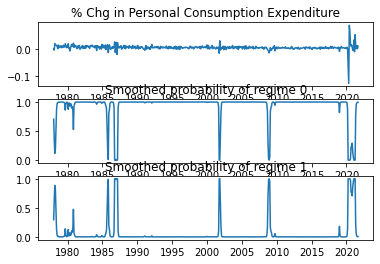

In [4]:
#build and train the MSDR model
msdr_model = sm.tsa.MarkovRegression(endog=df['PCE_CHG'], k_regimes=2,
    trend='c', exog=df['UMCSENT_CHG'], switching_variance=True)
msdr_model_results = msdr_model.fit(iter=1000)

#print model training summary
print(msdr_model_results.summary())

fig, axes = plt.subplots(3)
ax = axes[0]
ax.plot(df.index, df['PCE_CHG'])
ax.set(title="% Chg in Personal Consumption Expenditure")

ax = axes[1]
ax.plot(df.index, msdr_model_results.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of regime 0")

ax = axes[2]
ax.plot(df.index, msdr_model_results.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of regime 1")

plt.show()